In [1]:
pip install pyswarm


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyswarm in c:\users\nt465\.conda\envs\testenv\lib\site-packages (0.6)



In [6]:
# Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy import stats

from pyswarm import pso

In [7]:
import pandas as pd

# Load the dataset
file_path = "concrete_data.csv"
df = pd.read_csv(file_path)



In [4]:
#shape of the data
print(data.shape)

(1030, 9)


In [5]:
# Check for missing values
print(data.isnull().sum())

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


In [8]:
# overview of the data
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
# Check for duplicate rows
duplicates_df = df[df.duplicated()]

if not duplicates_df.empty:
    print("Duplicates found in the dataset:")
    print(duplicates_df)
else:
    print("No duplicates found in the dataset.")

Duplicates found in the dataset:
     cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
1

In [10]:
#remove the duplicates
df = df.drop_duplicates()

In [11]:
# number of rows and cols
df.shape

(1005, 9)

In [12]:
# check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


In [13]:
df.shape

(1005, 9)

In [14]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe().transpose())


Summary Statistics:
                                count        mean         std     min     25%  \
cement                         1005.0  278.631343  104.344261  102.00  190.70   
blast_furnace_slag             1005.0   72.043483   86.170807    0.00    0.00   
fly_ash                        1005.0   55.536318   64.207969    0.00    0.00   
water                          1005.0  182.075323   21.339334  121.80  166.60   
superplasticizer               1005.0    6.033234    5.919967    0.00    0.00   
coarse_aggregate               1005.0  974.376816   77.579667  801.00  932.00   
fine_aggregate                 1005.0  772.688259   80.340435  594.00  724.30   
age                            1005.0   45.856716   63.734692    1.00    7.00   
concrete_compressive_strength  1005.0   35.250378   16.284815    2.33   23.52   

                                 50%      75%     max  
cement                         265.0   349.00   540.0  
blast_furnace_slag              20.0   142.50   359.4  


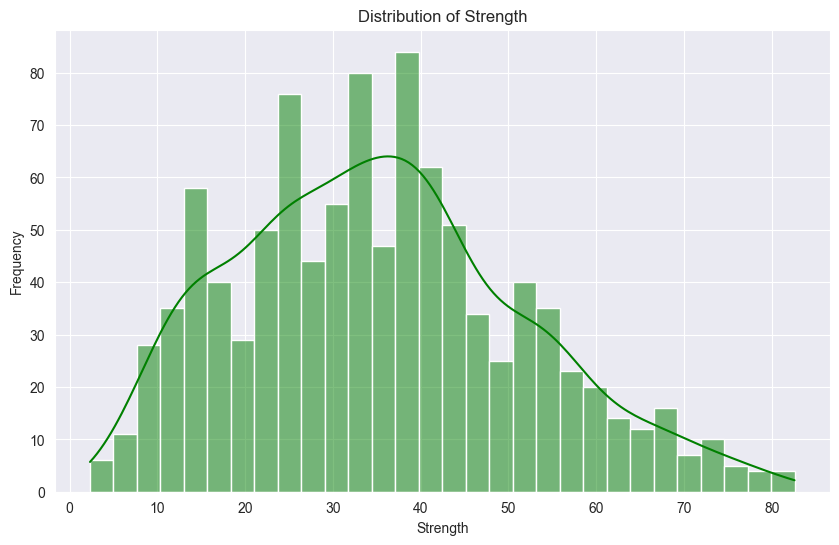

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['concrete_compressive_strength'], bins=30, kde=True, color='green')
plt.title('Distribution of Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.show()

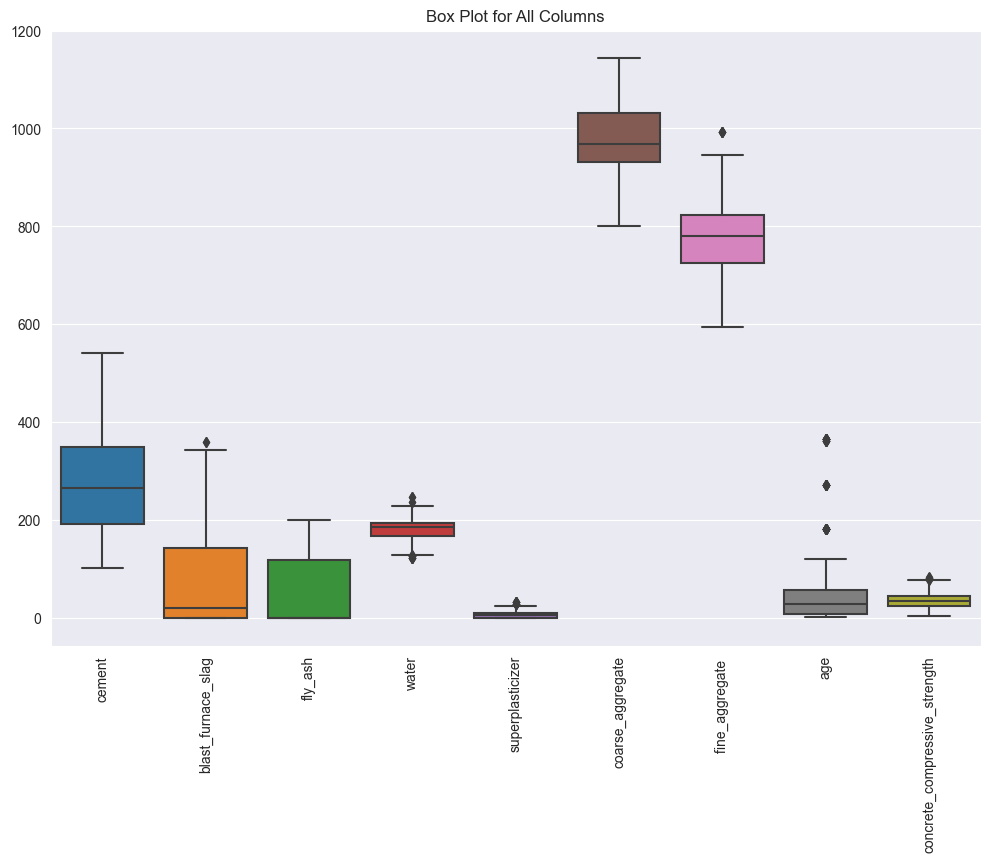

In [16]:
# check for outliers
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot for All Columns')
plt.show()

In [17]:
print(df.columns)


Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')


In [18]:
df.columns = df.columns.str.strip()


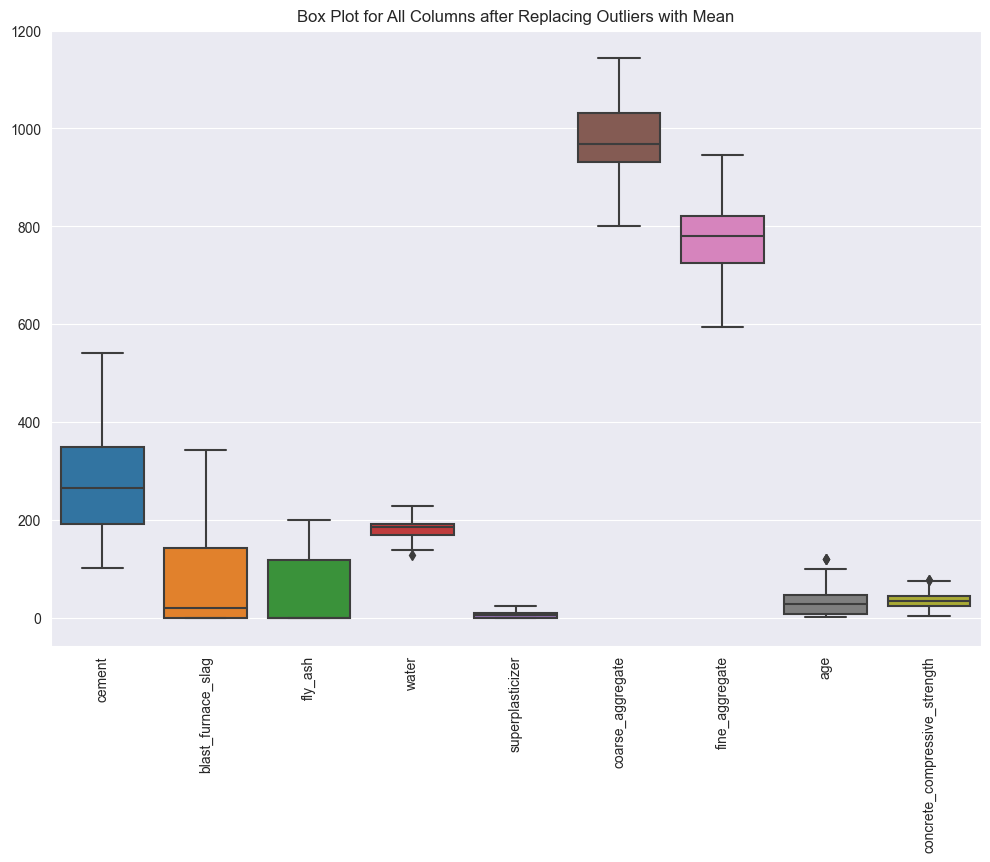

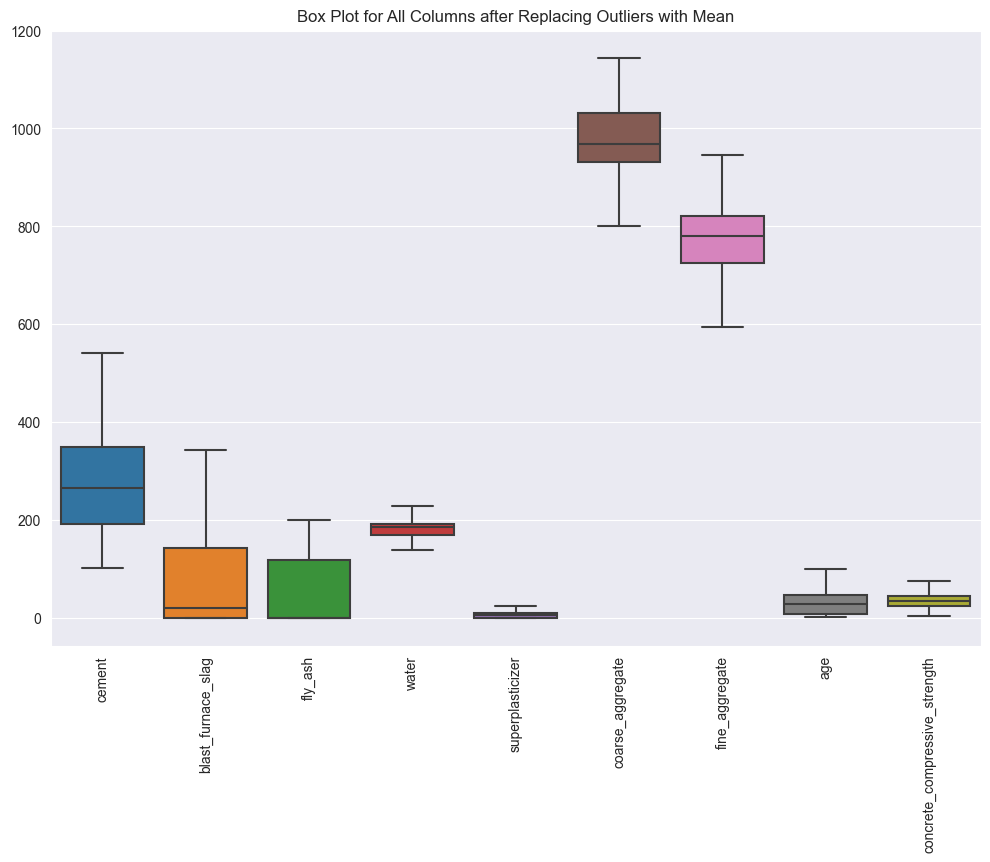

In [19]:
# Replace outliers with mean
def replace_outliers_with_mean(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Creating a copy of the column where outliers are replaced with the mean value
    column_cleaned = column.copy()
    column_cleaned[(column_cleaned < lower_bound) | (column_cleaned > upper_bound)] = column_cleaned.mean()
    return column_cleaned

# Assuming 'df' is your DataFrame
columns_to_replace_outliers = ['blast_furnace_slag', 'water','superplasticizer','fine_aggregate', 'age', 'concrete_compressive_strength']

# Apply the function to the selected columns
df[columns_to_replace_outliers] = df[columns_to_replace_outliers].apply(replace_outliers_with_mean)

# Plot boxplot to show the data after replacing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot for All Columns after Replacing Outliers with Mean')
plt.show()# Replace outliers with mean
def replace_outliers_with_mean(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Creating a copy of the column where outliers are replaced with the mean value
    column_cleaned = column.copy()
    column_cleaned[(column_cleaned < lower_bound) | (column_cleaned > upper_bound)] = column_cleaned.mean()
    return column_cleaned

# Assuming 'df' is your DataFrame
columns_to_replace_outliers = ['blast_furnace_slag', 'water','superplasticizer','fine_aggregate', 'age', 'concrete_compressive_strength']

# Apply the function to the selected columns
df[columns_to_replace_outliers] = df[columns_to_replace_outliers].apply(replace_outliers_with_mean)

# Plot boxplot to show the data after replacing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot for All Columns after Replacing Outliers with Mean')
plt.show()

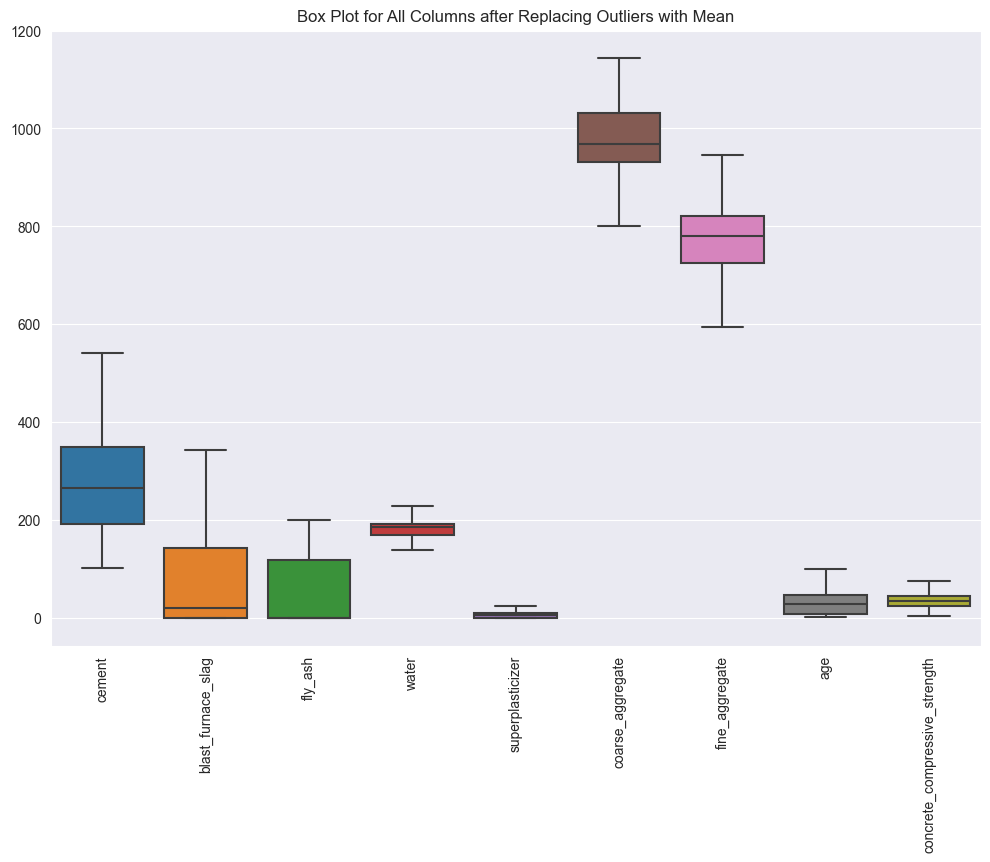

In [20]:
columns_to_replace_outliers = ['water', 'age', 'concrete_compressive_strength']
df[columns_to_replace_outliers] = df[columns_to_replace_outliers].apply(replace_outliers_with_mean)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot for All Columns after Replacing Outliers with Mean')
plt.show()

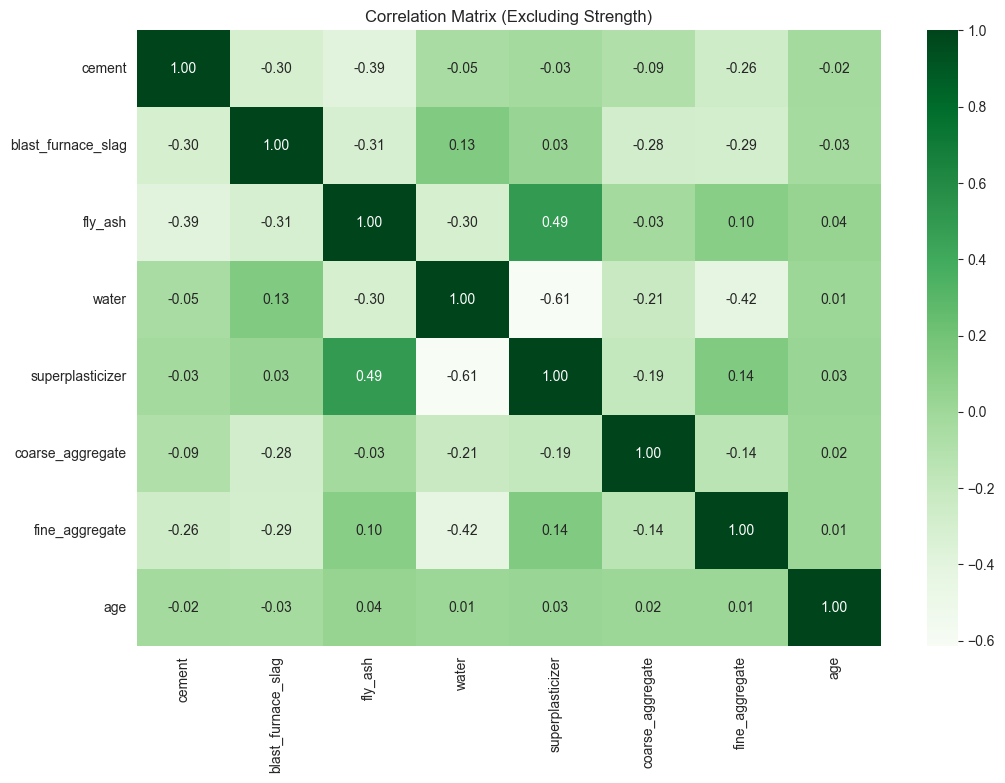

In [21]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop('concrete_compressive_strength', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix (Excluding Strength)')
plt.show()

In [22]:
# Assign predictors and target, removing 'Strength' and 'Superplasticizer'
concrete_data_columns = df.columns
predictors =df.drop(['concrete_compressive_strength', 'superplasticizer', 'water'], axis=1)
target = df['concrete_compressive_strength']

In [23]:
X = df.drop(columns=['concrete_compressive_strength'])
y = df['concrete_compressive_strength']    

In [24]:

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [25]:
# Print the number of rows
print("Number of rows in X_train:", X_train.shape[0])
print("Number of rows in X_test:", X_test.shape[0])
print("Number of rows in y_train:", Y_train.shape[0])
print("Number of rows in y_test:", Y_test.shape[0])

Number of rows in X_train: 804
Number of rows in X_test: 201
Number of rows in y_train: 804
Number of rows in y_test: 201


0:	learn: 14.7305373	total: 190ms	remaining: 3m 10s
200:	learn: 3.3734431	total: 549ms	remaining: 2.18s
400:	learn: 2.4090262	total: 899ms	remaining: 1.34s
600:	learn: 1.9740717	total: 1.24s	remaining: 825ms
800:	learn: 1.7475211	total: 1.61s	remaining: 400ms
999:	learn: 1.6006259	total: 1.96s	remaining: 0us
Training Set Metrics:
R2 score: 0.9895
MAE: 0.9315
RMSE: 1.6006

Test Set Metrics:
R2 score: 0.8865
MAE: 2.9182
RMSE: 5.3235
Accuracy: 90.21%


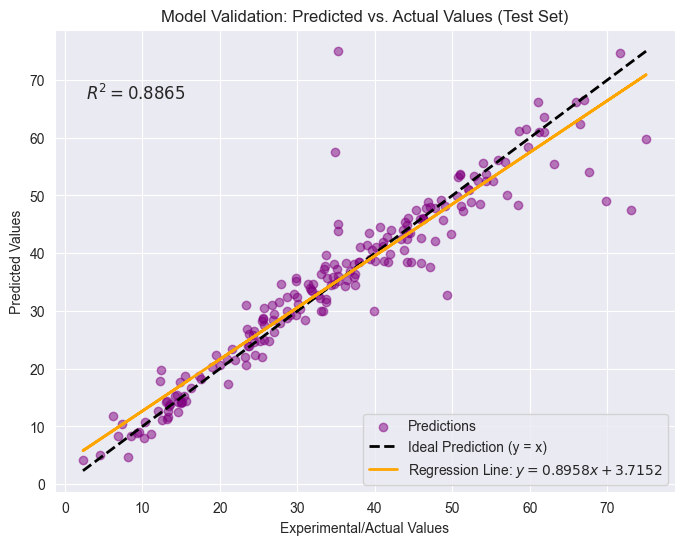

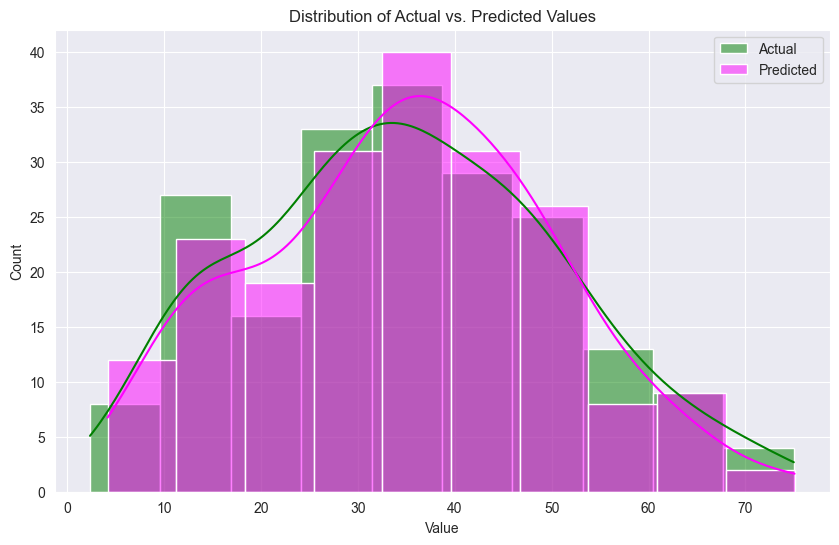

In [27]:
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from catboost import CatBoostRegressor  # Importing CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Initialize the CatBoost model
model = CatBoostRegressor(learning_rate=0.1, iterations=1000, depth=6, cat_features=[], verbose=200)

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the training and test sets
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Calculate the metrics for the test set
r2_test = r2_score(Y_test, Y_pred_test)
mae_test = mean_absolute_error(Y_test, Y_pred_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
mape_test = mean_absolute_percentage_error(Y_test, Y_pred_test)
accuracy_test = 100 - mape_test * 100 

# Evaluate the model on the training set
print("Training Set Metrics:")
print(f"R2 score: {r2_score(Y_train, Y_pred_train):.4f}")
print(f"MAE: {mean_absolute_error(Y_train, Y_pred_train):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_train, Y_pred_train)):.4f}")

# Evaluate the model on the test set
print("\nTest Set Metrics:")
print(f"R2 score: {r2_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"Accuracy: {accuracy_test:.2f}%")

# Scatter Plot for Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_test, alpha=0.5, label='Predictions', color='purple')

# Ideal Prediction Line (y = x)
max_val = max(Y_test.max(), Y_pred_test.max())
min_val = min(Y_test.min(), Y_pred_test.min())
plt.plot([min_val, max_val], [min_val, max_val], '--', lw=2, color='black', label='Ideal Prediction (y = x)')

# Regression Line for Predictions
coefficients = np.polyfit(Y_test, Y_pred_test, 1)
regression_line = np.polyval(coefficients, Y_test)
plt.plot(Y_test, regression_line, color='orange', lw=2, 
         label=f'Regression Line: $y = {coefficients[0]:.4f}x + {coefficients[1]:.4f}$')

# Add R² value to the plot
plt.text(0.05, 0.85, f'$R^2 = {r2_test:.4f}$', transform=plt.gca().transAxes, fontsize=12)

# Labels and title
plt.xlabel('Experimental/Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Validation: Predicted vs. Actual Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(Y_test, color='green', label='Actual', kde=True, alpha=0.5)
sns.histplot(Y_pred_test, color='magenta', label='Predicted', kde=True, alpha=0.5)
plt.xlabel('Value')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.show()


In [29]:
pip install catboost pandas scikit-learn

In [35]:
print(X.head())
print("=======================================================")
print(y.head())

   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  age  
0            1040.0   28  
1            1055.0   28  
2             932.0  270  
3             932.0  365  
4             978.4  360  
0    35.250378
1    61.890000
2    40.270000
3    41.050000
4    44.300000
Name: concrete_compressive_strength, dtype: float64


In [36]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset (replace 'concrete_data.csv' with your actual file path)
data = pd.read_csv('concrete_data.csv')

# Data preprocessing
# Ensure these column names match your dataset exactly
features = [
    'cement', 
    'blast_furnace_slag', 
    'fly_ash', 
    'water', 
    'superplasticizer',
    'coarse_aggregate', 
    'age'
]

target = 'concrete_compressive_strength'

X = data[features]
y = data[target]

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CatBoost model
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    verbose=200,
    random_state=42,
    early_stopping_rounds=50  # Added to prevent overfitting
)

model.fit(X_train, y_train)

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate metrics
def print_metrics(y_true, y_pred, set_name):
    print(f"\n{set_name} Metrics:")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

print_metrics(y_train, train_pred, "Training")
print_metrics(y_test, test_pred, "Test")

# Feature importance visualization
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance)

# Save model for future use
model.save_model('concrete_strength_model.cbm')

# Example prediction function
def predict_strength(input_data):
    """Example usage:
    predict_strength({
        'cement': 250,
        'blast_furnace_slag': 50,
        'fly_ash': 30,
        'water': 180,
        'superplasticizer': 5,
        'coarse_aggregate': 900,
        'age': 28
    })
    """
    df = pd.DataFrame([input_data])
    return model.predict(df)[0]

# Test prediction
sample_input = {
    'cement': 300,
    'blast_furnace_slag': 100,
    'fly_ash': 50,
    'water': 170,
    'superplasticizer': 7,
    'coarse_aggregate': 950,
    'age': 28
}

print(f"\nSample Prediction: {predict_strength(sample_input):.2f} MPa")

0:	learn: 15.7621642	total: 3.83ms	remaining: 3.83s
200:	learn: 2.8214396	total: 421ms	remaining: 1.67s
400:	learn: 2.0004854	total: 811ms	remaining: 1.21s
600:	learn: 1.6281341	total: 1.19s	remaining: 790ms
800:	learn: 1.4230488	total: 1.59s	remaining: 395ms
999:	learn: 1.2741876	total: 1.96s	remaining: 0us

Training Metrics:
R² Score: 0.9943
MAE: 0.6939
RMSE: 1.2742

Test Metrics:
R² Score: 0.9420
MAE: 2.4117
RMSE: 3.8675

Feature Importances:
              Feature  Importance
6                 age   35.266276
0              cement   27.933134
1  blast_furnace_slag   12.504109
3               water   12.207483
4    superplasticizer    6.294725
5    coarse_aggregate    3.902818
2             fly_ash    1.891454

Sample Prediction: 46.16 MPa


## USING FIREFLY

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR



# Objective function to minimize (Test RMSE)
def objective(params, algorithm='lgbm'):
    # Create model based on algorithm and parameters
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
            verbosity=0
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)
    else:
        raise ValueError("Unsupported algorithm")
    
    # Fit the model on training data
    model.fit(X_train, Y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    return rmse

# Firefly Algorithm for hyperparameter optimization
def firefly_algorithm(objective_func, lb, ub, num_fireflies=20, max_iter=15, alpha=0.5, beta0=1, gamma=1):
    num_params = len(lb)
    # Initialize fireflies randomly within bounds
    fireflies = np.random.uniform(low=lb, high=ub, size=(num_fireflies, num_params))
    fitness = np.array([objective_func(f) for f in fireflies])
    
    for iteration in range(max_iter):
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if fitness[j] < fitness[i]:  # Move firefly i towards j if j is brighter (i.e., lower RMSE)
                    distance = np.linalg.norm(fireflies[i] - fireflies[j])
                    beta = beta0 * np.exp(-gamma * distance ** 2)
                    fireflies[i] = fireflies[i] + beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(num_params) - 0.5)
                    # Ensure firefly remains within bounds
                    fireflies[i] = np.clip(fireflies[i], lb, ub)
                    fitness[i] = objective_func(fireflies[i])
                    
        # Reduce randomness over iterations
        alpha *= 0.9
        print(f"Iteration {iteration + 1}/{max_iter}, Best Test RMSE so far: {np.min(fitness):.4f}")
    
    best_index = np.argmin(fitness)
    return fireflies[best_index], fitness[best_index]

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 0.01], [1000, 0.3]),
    'svr': ([0.1, 0.01], [10, 1]),
}

# Container to hold the results
results = {}

# Optimize hyperparameters for each algorithm using the Firefly Algorithm
for algo in ['lgbm', 'rf', 'xgb', 'catboost', 'svr']:
    lb, ub = bounds[algo]
    print(f"\nOptimizing hyperparameters for {algo.upper()}...")
    best_params, best_rmse = firefly_algorithm(lambda params: objective(params, algorithm=algo), lb, ub)
    results[algo] = {'best_params': best_params, 'best_test_rmse': best_rmse}

# Evaluate and print detailed results for each algorithm
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    test_rmse = result['best_test_rmse']
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Test RMSE:     {test_rmse:.4f}\n")

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['best_test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['best_test_rmse']:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_test, alpha=0.5, label='Predictions', color='blue')

# Plot the perfect prediction line (y = x)
max_val = max(Y_test.max(), Y_pred_test.max())
min_val = min(Y_test.min(), Y_pred_test.min())
plt.plot([min_val, max_val], [min_val, max_val], '--', lw=2, color='red', label='Ideal Prediction (y = x)')

# Add regression line for predictions
coefficients = np.polyfit(Y_test, Y_pred_test, 1)
regression_line = np.polyval(coefficients, Y_test)
plt.plot(Y_test, regression_line, color='green', lw=2, 
         label=f'Regression Line: $y = {coefficients[0]:.4f}x + {coefficients[1]:.4f}$')

# Add R² value to the plot
plt.text(0.05, 0.85, f'$R^2 = {r2_test:.4f}$', transform=plt.gca().transAxes, fontsize=12)

# Labels and title
plt.xlabel('Experimental/Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Validation: Predicted vs. Actual Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 6))
sns.histplot(Y_test, color='blue', label='Actual', kde=True, alpha=0.5)
sns.histplot(Y_pred_test, color='red', label='Predicted', kde=True, alpha=0.5)
plt.xlabel('Value')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.show()


##  GWO inspired algorithm.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# Assuming X and Y are defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Objective function to minimize (RMSE)
def objective(params, algorithm='lgbm'):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                  learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                          random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                 learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                      learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                              learning_rate=learning_rate, random_state=42)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    return rmse

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 3, 0.01], [1000, 10, 0.3]),
    'gbr': ([100, 3, 0.01], [1000, 10, 0.3]),
    'svr': ([0.1, 0.01], [100, 1.0])  # C: [0.1, 100], epsilon: [0.01, 1.0]
}

# --- Gray Wolf Optimizer (GWO) Implementation ---
def gray_wolf_optimizer(objective_func, lb, ub, algorithm, num_wolves=20, max_iter=15):
    """
    GWO inspired algorithm.
    """
    num_params = len(lb)
    # Initialize positions of wolves randomly within the bounds
    positions = np.random.uniform(low=lb, high=ub, size=(num_wolves, num_params))
    
    # Initialize alpha, beta, delta (best, second best, third best)
    alpha_pos = np.zeros(num_params)
    alpha_score = float('inf')
    
    beta_pos = np.zeros(num_params)
    beta_score = float('inf')
    
    delta_pos = np.zeros(num_params)
    delta_score = float('inf')
    
    # Main loop of GWO
    for iter in range(max_iter):
        # Evaluate fitness of each wolf
        for i in range(num_wolves):
            fitness = objective_func(positions[i], algorithm=algorithm)
            
            # Update alpha, beta, and delta
            if fitness < alpha_score:
                delta_score = beta_score
                delta_pos = beta_pos.copy()
                beta_score = alpha_score
                beta_pos = alpha_pos.copy()
                alpha_score = fitness
                alpha_pos = positions[i].copy()
            elif fitness < beta_score:
                delta_score = beta_score
                delta_pos = beta_pos.copy()
                beta_score = fitness
                beta_pos = positions[i].copy()
            elif fitness < delta_score:
                delta_score = fitness
                delta_pos = positions[i].copy()
        
        # Parameter a decreases linearly from 2 to 0
        a = 2 - iter * (2 / max_iter)
        
        # Update the position of each wolf
        for i in range(num_wolves):
            for j in range(num_params):
                r1 = np.random.rand()
                r2 = np.random.rand()
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = abs(C1 * alpha_pos[j] - positions[i][j])
                X1 = alpha_pos[j] - A1 * D_alpha

                r1 = np.random.rand()
                r2 = np.random.rand()
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = abs(C2 * beta_pos[j] - positions[i][j])
                X2 = beta_pos[j] - A2 * D_beta

                r1 = np.random.rand()
                r2 = np.random.rand()
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = abs(C3 * delta_pos[j] - positions[i][j])
                X3 = delta_pos[j] - A3 * D_delta

                positions[i][j] = np.clip((X1 + X2 + X3) / 3, lb[j], ub[j])
                
        print(f"{algorithm.upper()} - Iteration {iter + 1}/{max_iter}, Best RMSE: {alpha_score:.4f}")
    
    return alpha_pos, alpha_score

# Container for GWO results for each algorithm
results = {}

for algo in bounds.keys():
    lb, ub = bounds[algo]
    best_params, best_rmse = gray_wolf_optimizer(objective, lb, ub, algorithm=algo,
                                                  num_wolves=20, max_iter=15)
    results[algo] = {'best_params': best_params, 'best_rmse': best_rmse}

# Define the evaluate_model function to get training and test metrics
def evaluate_model(algorithm, params):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                  learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                          random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                 learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                      learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                              learning_rate=learning_rate, random_state=42)

    # Fit the model on training data
    model.fit(X_train, Y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)
    
    return train_rmse, test_rmse, train_r2, test_r2

# Final Model Evaluation Output Format
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    train_rmse, test_rmse_eval, train_r2, test_r2 = evaluate_model(algo, best_params)
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:     {test_rmse_eval:.4f}")
    print(f"  Training R² Score: {train_r2:.4f}")
    print(f"  Test R² Score:     {test_r2:.4f}\n")
    results[algo].update({
        'train_rmse': train_rmse, 
        'test_rmse': test_rmse_eval, 
        'train_r2': train_r2, 
        'test_r2': test_r2
    })

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['test_rmse']:.4f}")


## BAt algorithm

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# Assuming X and Y are defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Objective function to minimize (RMSE)
def objective(params, algorithm='lgbm'):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                  learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                          random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                 learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                      learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                              learning_rate=learning_rate, random_state=42)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    return rmse

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 3, 0.01], [1000, 10, 0.3]),
    'gbr': ([100, 3, 0.01], [1000, 10, 0.3]),
    'svr': ([0.1, 0.01], [100, 1.0])  # C: [0.1, 100], epsilon: [0.01, 1.0]
}

# --- Bat Algorithm (BA) Implementation ---
def bat_algorithm(objective_func, lb, ub, algorithm, num_bats=20, max_iter=15, 
                  f_min=0, f_max=2, alpha=0.9, gamma=0.9):
    """
    A simple Bat Algorithm implementation.
    
    Parameters:
      - objective_func: function to minimize.
      - lb: lower bound (list or array of size num_params).
      - ub: upper bound (list or array of size num_params).
      - algorithm: algorithm name (passed to objective_func).
      - num_bats: number of bats (population size).
      - max_iter: number of iterations.
      - f_min, f_max: frequency range.
      - alpha: loudness update parameter.
      - gamma: pulse rate update parameter.
    
    Returns:
      - best_solution: best hyperparameter set found.
      - best_fitness: best fitness (RMSE) value.
    """
    num_params = len(lb)
    # Initialize positions and velocities
    positions = np.random.uniform(low=lb, high=ub, size=(num_bats, num_params))
    velocities = np.zeros((num_bats, num_params))
    frequencies = np.zeros(num_bats)
    loudness = np.ones(num_bats)    # Typically starts with a high value (here 1)
    pulse_rate = np.zeros(num_bats)   # Typically starts low

    # Evaluate initial fitness
    fitness = np.array([objective_func(pos, algorithm=algorithm) for pos in positions])
    best_idx = np.argmin(fitness)
    best_solution = positions[best_idx].copy()
    best_fitness = fitness[best_idx]

    for t in range(max_iter):
        for i in range(num_bats):
            # Update frequency
            frequencies[i] = f_min + (f_max - f_min) * np.random.rand()
            # Update velocity and position
            velocities[i] = velocities[i] + (positions[i] - best_solution) * frequencies[i]
            new_solution = positions[i] + velocities[i]
            new_solution = np.clip(new_solution, lb, ub)

            # Local search: with a probability, generate a solution around the best solution
            if np.random.rand() > pulse_rate[i]:
                new_solution = best_solution + 0.001 * np.random.randn(num_params)
                new_solution = np.clip(new_solution, lb, ub)

            new_fitness = objective_func(new_solution, algorithm=algorithm)

            # Accept the new solution if it improves fitness and with a certain probability
            if (new_fitness < fitness[i]) and (np.random.rand() < loudness[i]):
                positions[i] = new_solution.copy()
                fitness[i] = new_fitness
                # Update loudness and pulse rate
                loudness[i] = alpha * loudness[i]
                pulse_rate[i] = pulse_rate[i] * (1 - np.exp(-gamma * t))

            # Update the global best solution
            if new_fitness < best_fitness:
                best_solution = new_solution.copy()
                best_fitness = new_fitness

        print(f"{algorithm.upper()} - Iteration {t + 1}/{max_iter}, Best RMSE: {best_fitness:.4f}")
    return best_solution, best_fitness

# Container for BA results for each algorithm
results = {}

for algo in bounds.keys():
    lb, ub = bounds[algo]
    best_params, best_rmse = bat_algorithm(objective, lb, ub, algorithm=algo,
                                           num_bats=20, max_iter=15,
                                           f_min=0, f_max=2, alpha=0.9, gamma=0.9)
    results[algo] = {'best_params': best_params, 'best_rmse': best_rmse}

# Define the evaluate_model function to get training and test metrics
def evaluate_model(algorithm, params):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                  learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                          random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                 learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                      learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                              learning_rate=learning_rate, random_state=42)

    # Fit the model on training data
    model.fit(X_train, Y_train)
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)

    return train_rmse, test_rmse, train_r2, test_r2

# Final Model Evaluation Output Format
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    train_rmse, test_rmse_eval, train_r2, test_r2 = evaluate_model(algo, best_params)
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:     {test_rmse_eval:.4f}")
    print(f"  Training R² Score: {train_r2:.4f}")
    print(f"  Test R² Score:     {test_r2:.4f}\n")
    results[algo].update({
        'train_rmse': train_rmse, 
        'test_rmse': test_rmse_eval, 
        'train_r2': train_r2, 
        'test_r2': test_r2
    })

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['test_rmse']:.4f}")
                                                                            